# Importar bibliotecas básicas

In [1]:
# !pip install scikit-learn
# !pip install sklearn.preprocessing
# !pip install cython
# !pip install --upgrade pip
# !pip install seaborn
# !pip install plotly
# !pip install --upgrade numpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn

# Importar dados

In [3]:
paths = ['data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv','data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
            'data/Friday-WorkingHours-Morning.pcap_ISCX.csv','data/Monday-WorkingHours.pcap_ISCX.csv',
            'data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv','data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
            'data/Tuesday-WorkingHours.pcap_ISCX.csv','data/Wednesday-workingHours.pcap_ISCX.csv']
dfs = []
for path in paths:
    dfs.append(pd.read_csv(path, encoding='utf-8'))
df = pd.concat(dfs)

In [4]:
# df.sample()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

# Tratamento de dados

In [6]:
df = df.sample(2830743)
df.reset_index(drop=True, inplace=True)


In [7]:
df[' Label'].value_counts()

 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [8]:
joined_test = df.iloc[0:700000].copy()
joined_val = df.iloc[700000:1400000].copy()
separated_test = df.iloc[1400000:2100000].copy()
separated_val = df.iloc[2100000:2800000].copy()

joined_test.reset_index(drop=True, inplace=True)
joined_val.reset_index(drop=True, inplace=True)
separated_test.reset_index(drop=True, inplace=True)
separated_val.reset_index(drop=True, inplace=True)

In [9]:
joined_test.columns = [col.strip() for col in joined_test.columns]
joined_val.columns = [col.strip() for col in joined_val.columns]
separated_test.columns = [col.strip() for col in separated_test.columns]
separated_val.columns = [col.strip() for col in separated_val.columns]

In [10]:
#check what are the categories in the column ' Label' and how many instances are there for each category
# joined_test['Label'].value_counts()
# joined_val['Label'].value_counts()
separated_test['Label'].value_counts()
# separated_val['Label'].value_counts()

Label
BENIGN                        562186
DoS Hulk                       57219
PortScan                       39325
DDoS                           31587
DoS GoldenEye                   2507
FTP-Patator                     1892
SSH-Patator                     1436
DoS slowloris                   1436
DoS Slowhttptest                1366
Bot                              487
Web Attack � Brute Force         378
Web Attack � XSS                 162
Infiltration                      11
Web Attack � Sql Injection         6
Heartbleed                         2
Name: count, dtype: int64

In [11]:
# Replace inf and -inf with NaN
joined_test.replace([np.inf, -np.inf], np.nan, inplace=True)
joined_val.replace([np.inf, -np.inf], np.nan, inplace=True)
separated_test.replace([np.inf, -np.inf], np.nan, inplace=True)
separated_val.replace([np.inf, -np.inf], np.nan, inplace=True)

In [12]:
joined_test.dropna(inplace=True)
joined_val.dropna(inplace=True)
separated_test.dropna(inplace=True)
separated_val.dropna(inplace=True)

# Divisão entre previsores e classe

In [13]:
print(joined_test['Label'].value_counts(), joined_val['Label'].value_counts())

Label
BENIGN                        561544
DoS Hulk                       56979
PortScan                       39216
DDoS                           31671
DoS GoldenEye                   2566
FTP-Patator                     2005
SSH-Patator                     1481
DoS slowloris                   1428
DoS Slowhttptest                1349
Bot                              463
Web Attack � Brute Force         403
Web Attack � XSS                 178
Web Attack � Sql Injection         7
Infiltration                       3
Heartbleed                         2
Name: count, dtype: int64 Label
BENIGN                        561754
DoS Hulk                       56977
PortScan                       39108
DDoS                           31666
DoS GoldenEye                   2529
FTP-Patator                     1954
DoS slowloris                   1468
SSH-Patator                     1443
DoS Slowhttptest                1426
Bot                              497
Web Attack � Brute Force         336


In [14]:
# change the joined df joined so that it contains only the labels "benign" and all others become a label "attack"
for index, row in joined_test.iterrows():
    if row['Label'] != 'BENIGN':
        joined_test.at[index, 'Label'] = 'Attack'
for index, row in joined_val.iterrows():
    if row['Label'] != 'BENIGN':
        joined_val.at[index, 'Label'] = 'Attack'



In [15]:
print(joined_test['Label'].value_counts(), joined_val['Label'].value_counts())

Label
BENIGN    561544
Attack    137751
Name: count, dtype: int64 Label
BENIGN    561754
Attack    137580
Name: count, dtype: int64


In [16]:
print(separated_test['Label'].value_counts(), separated_val['Label'].value_counts())

Label
BENIGN                        561717
DoS Hulk                       56972
PortScan                       39299
DDoS                           31587
DoS GoldenEye                   2507
FTP-Patator                     1892
SSH-Patator                     1436
DoS slowloris                   1436
DoS Slowhttptest                1366
Bot                              486
Web Attack � Brute Force         378
Web Attack � XSS                 162
Infiltration                      11
Web Attack � Sql Injection         6
Heartbleed                         2
Name: count, dtype: int64 Label
BENIGN                        561646
DoS Hulk                       56759
PortScan                       39396
DDoS                           31706
DoS GoldenEye                   2572
FTP-Patator                     1990
SSH-Patator                     1476
DoS slowloris                   1402
DoS Slowhttptest                1297
Bot                              489
Web Attack � Brute Force         373


In [17]:
from sklearn.preprocessing import LabelEncoder
data = [joined_test, joined_val, separated_test, separated_val]
atributo = 'Label'
for d in data:
    le = LabelEncoder()
    d[atributo] = le.fit_transform(d[atributo].values)        

In [18]:
print(separated_test['Label'].value_counts(), separated_val['Label'].value_counts())

Label
0     561717
4      56972
10     39299
2      31587
3       2507
7       1892
11      1436
6       1436
5       1366
1        486
12       378
14       162
9         11
13         6
8          2
Name: count, dtype: int64 Label
0     561646
4      56759
10     39396
2      31706
3       2572
7       1990
11      1476
6       1402
5       1297
1        489
12       373
14       146
9         11
13         5
8          2
Name: count, dtype: int64


In [19]:
print(joined_test['Label'].value_counts(), joined_val['Label'].value_counts())

Label
1    561544
0    137751
Name: count, dtype: int64 Label
1    561754
0    137580
Name: count, dtype: int64


In [20]:
joined_test_y = joined_test['Label']
joined_test_x = joined_test.drop('Label', axis=1)
joined_val_y = joined_val['Label']
joined_val_x = joined_val.drop('Label', axis=1)
separated_test_y = separated_test['Label']
separated_test_x = separated_test.drop('Label', axis=1)
separated_val_y = separated_val['Label']
separated_val_x = separated_val.drop('Label', axis=1)

# Normalização

In [21]:
from sklearn.preprocessing import MinMaxScaler


minmax_scaler        = MinMaxScaler()
x_norm               = minmax_scaler.fit_transform(joined_test_x)
joined_test_x        = pd.DataFrame(x_norm)
x_norm               = minmax_scaler.fit_transform(joined_val_x)
joined_val_x         = pd.DataFrame(x_norm)
x_norm               = minmax_scaler.fit_transform(separated_test_x)
separated_test_x     = pd.DataFrame(x_norm)
x_norm               = minmax_scaler.fit_transform(separated_val_x)
separated_val_x      = pd.DataFrame(x_norm)

# PCA - redução de dimensões

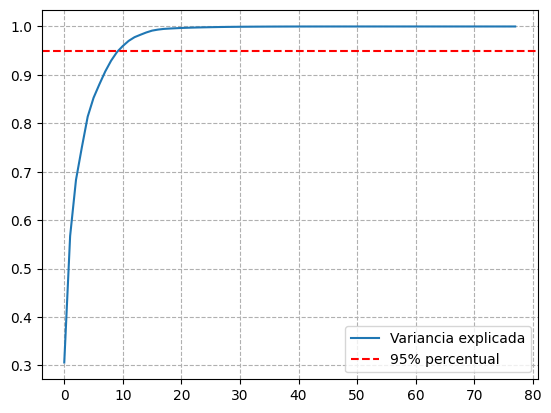

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(separated_val_x)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variancia explicada')
plt.axhline(0.95,color='red',linestyle='--',label='95% percentual')
plt.grid(True, linestyle='--')
plt.legend()

In [23]:
to_pca = [joined_test_x, joined_val_x, separated_test_x, separated_val_x]
to_df = []
for df in to_pca:
    pca       = PCA(n_components=15)
    dados_pca = pca.fit_transform(df)
    to_df.append(pd.DataFrame(dados_pca))
    # df.head()
    # sns.scatterplot(x=dados_pca[:,0],y=dados_pca[:,1],hue=Y)
to_df.append(joined_test_y)
to_df.append(joined_val_y)
to_df.append(separated_test_y)
to_df.append(separated_val_y)

# Ajustar formatos

In [24]:
to_float32 = []
for df in to_df:
    to_float32.append(pd.DataFrame(df))


In [25]:
# Convert only float64 columns to float32
to_save = []
for df in to_float32:
    to_save.append(df.apply(lambda x: x.astype('float32') if x.dtype == 'float64' or x.dtype == 'int64' else x))


# Salvar bases de dados

In [26]:
## aqui não vale a pena dropar as linhas duplicadas, pois droparíamos as duplicadas no x e perderíamos a referência do y
# data = data.drop_duplicates()

In [27]:
name = ['joined_test_x', 'joined_val_x', 'separated_test_x', 'separated_val_x', 'joined_test_y', 'joined_val_y', 'separated_test_y', 'separated_val_y']
for df,i in zip(to_save,range(len(to_save))):
    df.to_csv(name[i], index=False)

In [28]:
to_save[0].head()

0         1         2         3         4         5         6   \
0  0.091881 -0.849138  0.531572  0.212544  0.093026 -0.146420 -0.182517   
1 -0.507511  0.680919  0.276441  0.008692 -0.040933 -0.024220 -0.252700   
2 -0.272195 -0.165009 -0.445929  0.004244 -0.012879  0.032111  0.066749   
3 -0.278055 -0.164874 -0.446445 -0.007696 -0.015261  0.027579  0.059936   
4  0.120337 -0.693644  0.283444  0.180019  0.047829  0.027468 -0.096326   

         7         8         9         10        11        12        13  \
0  0.316584  0.380575  0.385790  0.003258 -0.077493  0.012072 -0.013187   
1 -0.501345  0.055043  0.175326  0.068918 -0.063582  0.008437 -0.004752   
2  0.005908 -0.044491  0.070965 -0.023524 -0.003529 -0.014284 -0.007183   
3  0.007146 -0.044719  0.067309 -0.026148 -0.004938 -0.015600 -0.004263   
4  0.025876 -0.127451 -0.169511  0.005223 -0.036941  0.015475 -0.011967   

         14  
0  0.001282  
1 -0.133099  
2 -0.001867  
3 -0.001319  
4 -0.021413